## IMPORTING REQUIRED LIBRARY

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## LOADING DATASET

In [18]:
# Loading the 2 datasets into pandas dataframe

transc_data = pd.read_excel('C:/Users/user/OneDrive/Data Analysis/Quantium Chips Category  Data analytics Project/Python/QVI_transaction_data.xlsx')
cust_data = pd.read_csv('C:/Users/user/OneDrive/Data Analysis/Quantium Chips Category  Data analytics Project/Python/QVI_purchase_behaviour.csv')

## DATA WRANGLING

#### TRANSACTION DATASET

Note the transc_data columns:  `DATE`, `STORE_NBR`, `LYLTY_CARD_NBR`, `TXN_ID`, `PROD_NBR`, `PROD_NAME`, `PROD_QTY`, `TOT_SALES`

In [19]:
transc_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [23]:
# Checking the datatypes of the transaction data table
transc_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [24]:
# changing the 'date' column to a datetime type instead of an integer.
transc_data['DATE'] = pd.to_datetime(transc_data['DATE'], unit = 'D', origin = '1900-01-01')


In [25]:
transc_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [26]:
# Removing whitespaces
transc_data['PROD_NAME'] = transc_data['PROD_NAME'].str.strip()

In [27]:
# Checking each column to see if there are any null values available:

missing_transc_data = transc_data.isnull()
missing_transc_data.head()

for column in missing_transc_data.columns.values.tolist():
    print(missing_transc_data[column].value_counts())
    print("")

DATE
False    264836
Name: count, dtype: int64

STORE_NBR
False    264836
Name: count, dtype: int64

LYLTY_CARD_NBR
False    264836
Name: count, dtype: int64

TXN_ID
False    264836
Name: count, dtype: int64

PROD_NBR
False    264836
Name: count, dtype: int64

PROD_NAME
False    264836
Name: count, dtype: int64

PROD_QTY
False    264836
Name: count, dtype: int64

TOT_SALES
False    264836
Name: count, dtype: int64



In [28]:
# Removing all null values if there are any:
#transc_data.dropna(how = 'all', inplace = True)

In [29]:
# Number of duplicates:
sum((transc_data['DATE']).duplicated())

264472

In [30]:
# Checking for duplicates:

transc_data_dupl = {}

# loop through each column to check for duplicates
for column in transc_data.columns:
    if transc_data[column].duplicated().any():
        # Store duplicate values
        transc_data_dupl[column] = transc_data[column][transc_data[column].duplicated()]

# Print columns with duplicate values
for column, values in transc_data_dupl.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

Column 'DATE' has duplicate values:
7        2019-05-18
9        2018-08-20
11       2018-08-22
13       2018-08-19
15       2019-05-21
            ...    
264831   2019-03-11
264832   2018-08-15
264833   2018-11-08
264834   2018-12-29
264835   2018-09-24
Name: DATE, Length: 264472, dtype: datetime64[ns]

Column 'STORE_NBR' has duplicate values:
1           1
2           1
4           2
6           4
7           4
         ... 
264831    272
264832    272
264833    272
264834    272
264835    272
Name: STORE_NBR, Length: 264564, dtype: int64

Column 'LYLTY_CARD_NBR' has duplicate values:
35         51100
40         55072
42         55073
65         83008
81        109028
           ...  
264826    272194
264827    272197
264829    272236
264831    272319
264834    272379
Name: LYLTY_CARD_NBR, Length: 192199, dtype: int64

Column 'TXN_ID' has duplicate values:
42         48887
377         7739
419        10982
476        14546
511        16683
           ...  
264287    250293
264318   

In [31]:
transc_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [32]:
# Creating a new column 'PACK SIZE' and getting it's values by extracting the size of the products included in the product name.

import re
transc_data['PACK SIZE'] = transc_data['PROD_NAME'].str.extract(r'(\d+g)', flags = re.IGNORECASE)

In [33]:
transc_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
PACK SIZE                 object
dtype: object

In [34]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


Remove the string 'g' and 'G' from the `PACK SIZE` and rename it as `PACK SIZE(g)`

In [36]:
# Let us remove the string 'g' from the 'PACK SIZE' column and rename it to be 'PACK SIZE(g)'

# Remove the 'g' and convert to numeric
transc_data['PACK SIZE'] = transc_data['PACK SIZE'].str.replace('g', '')



In [37]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [38]:
# Let us remove the string 'G' from the 'PACK SIZE' column

transc_data['PACK SIZE'] = transc_data['PACK SIZE'].str.replace('G', '')

In [39]:
# Converting the type for 'PACK SIZE' from str(object) to int.
transc_data['PACK SIZE'] = transc_data['PACK SIZE'].astype(int)

In [40]:
transc_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
PACK SIZE                  int32
dtype: object

### Create a new column `BRAND_NAME`
This will be done by splitting the first words in the product names 
Use the method `.split` to accomplish this.

In [42]:
# Creating the a new column 'BRAND_NAME' from the 'PROD_NAME' column by splitting the first words in the product names
# use the '.split()' method

transc_data['BRAND_NAME'] = transc_data['PROD_NAME'].str.split().str[0]

In [43]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE,BRAND_NAME
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


#### CUSTOMER DATASET

In [45]:
cust_data


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [46]:
cust_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [47]:
# Checking for missing data:
missing_cust_data = cust_data.isnull()

for column in missing_cust_data.columns.values.tolist():
    print(missing_cust_data[column].value_counts())
    print("")

LYLTY_CARD_NBR
False    72637
Name: count, dtype: int64

LIFESTAGE
False    72637
Name: count, dtype: int64

PREMIUM_CUSTOMER
False    72637
Name: count, dtype: int64



In [48]:
# Checking for whitespaces:
def check_whitespaces(cust_data):
    for column in cust_data.columns:
        if cust_data[column].dtype == 'object': # checks only string columns
            whitespaces = cust_data[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(cust_data[whitespaces])
            else:
                print("There are no whitespaces in this data")

# Run the function:
check_whitespaces(cust_data)

There are no whitespaces in this data
There are no whitespaces in this data


## MERGING THE TWO DATASETS TOGETHER

Use the `LYLTY_CARD_NBR` as the primary key for the merge

In [50]:
# Merge both the transc_data and cust_data together:

merged_data = pd.merge(transc_data, cust_data, on = 'LYLTY_CARD_NBR', how = 'left')

In [51]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [52]:
# Sort the merged data by the date
merged_data = merged_data.sort_values(by='DATE').reset_index()

In [53]:
merged_data.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,100938,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,65566,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream
2,43733,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
3,175455,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,Kettle,RETIREES,Premium
4,205813,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream


In [54]:
# Check for the missing data in the merged data
missing_merged_data = merged_data.isnull()

for column in missing_merged_data.columns.values.tolist():
    print(missing_merged_data[column].value_counts())
    print("")

index
False    264836
Name: count, dtype: int64

DATE
False    264836
Name: count, dtype: int64

STORE_NBR
False    264836
Name: count, dtype: int64

LYLTY_CARD_NBR
False    264836
Name: count, dtype: int64

TXN_ID
False    264836
Name: count, dtype: int64

PROD_NBR
False    264836
Name: count, dtype: int64

PROD_NAME
False    264836
Name: count, dtype: int64

PROD_QTY
False    264836
Name: count, dtype: int64

TOT_SALES
False    264836
Name: count, dtype: int64

PACK SIZE
False    264836
Name: count, dtype: int64

BRAND_NAME
False    264836
Name: count, dtype: int64

LIFESTAGE
False    264836
Name: count, dtype: int64

PREMIUM_CUSTOMER
False    264836
Name: count, dtype: int64



#### Cross-checking for missing values

In [56]:
# Checking for duplicates in the merged data:

merged_data_dupl = {}

# loop through each column to check for duplicates
for column in merged_data.columns:
    if merged_data[column].duplicated().any():
        # Store duplicate values
        merged_data_dupl[column] = merged_data[column][merged_data[column].duplicated()]

# Print columns with duplicate values
for column, values in merged_data_dupl.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

Column 'DATE' has duplicate values:
1        2018-07-03
2        2018-07-03
3        2018-07-03
4        2018-07-03
5        2018-07-03
            ...    
264831   2019-07-02
264832   2019-07-02
264833   2019-07-02
264834   2019-07-02
264835   2019-07-02
Name: DATE, Length: 264472, dtype: datetime64[ns]

Column 'STORE_NBR' has duplicate values:
12         23
18        102
31         24
35        144
36         19
         ... 
264831     97
264832    148
264833    212
264834     55
264835    247
Name: STORE_NBR, Length: 264564, dtype: int64

Column 'LYLTY_CARD_NBR' has duplicate values:
100       154240
311        55073
488       129181
665       201359
792       155172
           ...  
264831     97085
264832    148317
264833    212068
264834     55029
264835    247060
Name: LYLTY_CARD_NBR, Length: 192199, dtype: int64

Column 'TXN_ID' has duplicate values:
100       154455
311        48884
488       133312
665       201500
792       156136
           ...  
264350    222295
264464   

In [35]:
# Let's check for outliers in the total_sales columN

def find_outliers_iqr(merged_data): # defines a function named 'find_outliers_iqr' taking a parameter 'merged data' which is the dataframe we are using.
    outliers = pd.DataFrame() # initializing an empty dataframe that would store the detected outliers when the function executes.
    for column in ['TOT_SALES']: # begins a loop that iterates over the specified column
        Q1 = merged_data[column].quantile(0.25) # calculates the 25th percentile(1st quartile) of the values in the column of the dataframe
        Q3 = merged_data[column].quantile(0.75) # calculates the 75th percentile(3rd quartile) of the values in the column of the dataframe
        IQR = Q3 - Q1 # Computes the interquartile range (IQR) by subtracting Q1 from Q3
        lower_bound = Q1 - 1.5 * IQR # calculates the lower bound for outliers using the formula 'Q1 - 1.5 * IQR'
        upper_bound = Q3 + 1.5 * IQR # calculates the upper bound for outliers using the formula 'Q3 + 1.5 * IQR'
        column_outliers = merged_data[(merged_data[column] < lower_bound) | (merged_data[column] > upper_bound)] # filters rows from the dataframe 'merged_data' are either less than 'lower_bound' or greater than 'upper_bound'. 
        outliers = pd.concat([outliers, column_outliers]) # concatenates the dataframe 'column_outliers' with the 'outliers' dataframe. This effectively accumulates all detected outliers across all iterations of the loop.
    return outliers.drop_duplicates() # returns the 'outliers' dataframe after removing any duplicate rows. This ensures that each outlier is only included once in the final output.

# calls the functon
outliers_iqr = find_outliers_iqr(merged_data)
print("Outliers detected using IQR method:")
print(outliers_iqr.head())

Outliers detected using IQR method:
        index       DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
13235  159082 2018-07-21        105          105127  106050        23   
32069   55589 2018-08-16        205          205334  204402        14   
32085   99201 2018-08-16         63           63094   59958       108   
32109   69815 2018-08-16        257          257208  257019        45   
32116  150730 2018-08-16        130          130180  134407        87   

                                      PROD_NAME  PROD_QTY  TOT_SALES  \
13235                      Cheezels Cheese 330g         3       17.1   
32069    Smiths Crnkle Chip  Orgnl Big Bag 380g         3       17.7   
32085  Kettle Tortilla ChpsHny&Jlpno Chili 150g         5       23.0   
32109    Smiths Thinly Cut   Roast Chicken 175g         5       15.0   
32116   Infuzions BBQ Rib   Prawn Crackers 110g         5       19.0   

       PACK SIZE BRAND_NAME              LIFESTAGE PREMIUM_CUSTOMER  
13235        330   Che

In [36]:
merged_data

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,100938,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,65566,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream
2,43733,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
3,175455,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,Kettle,RETIREES,Premium
4,205813,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,40823,2019-07-02,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs,OLDER FAMILIES,Budget
264832,249581,2019-07-02,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165,Tyrrells,YOUNG SINGLES/COUPLES,Mainstream
264833,78296,2019-07-02,212,212068,210874,113,Twisties Chicken270g,2,9.2,270,Twisties,OLDER FAMILIES,Premium
264834,121166,2019-07-02,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110,Cobs,OLDER SINGLES/COUPLES,Premium


In [ ]:
merged_data.info()

##                                      DATA EXPLORATION






In [40]:
# Calculating the correlation: 

numeric_df = merged_data.select_dtypes(include=[np.number]) #selects on columns with int or float datatype since 'corr' cannot be used on a non-int or float value
numeric_df.corr()


,index,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK SIZE
index,1.000000,0.060967,0.057914,0.060694,0.000477,-0.024440,-0.011576,0.001867
STORE_NBR,0.060967,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234,0.000286
LYLTY_CARD_NBR,0.057914,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908,0.000739
TXN_ID,0.060694,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468,0.000262
PROD_NBR,0.000477,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851,-0.230455
PROD_QTY,-0.024440,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307,0.008078
TOT_SALES,-0.011576,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000,0.307967
PACK SIZE,0.001867,0.000286,0.000739,0.000262,-0.230455,0.008078,0.307967,1.000000


(0.0, 818.5123689382251)

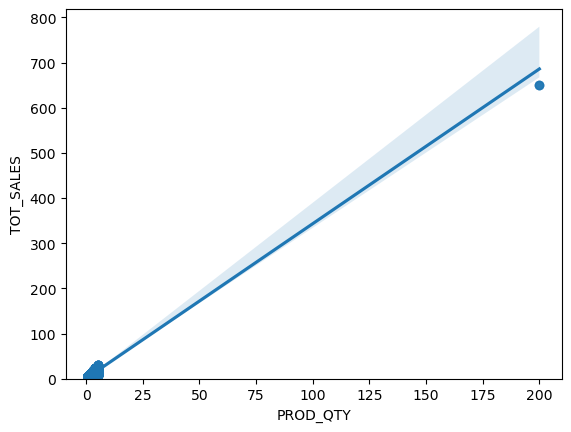

In [41]:
# PROD_QTY vs. TOT_SALES
sns.regplot(x= 'PROD_QTY', y= 'TOT_SALES', data = merged_data)
plt.ylim(0,)

In [42]:
merged_data[['PROD_QTY', 'TOT_SALES']].corr()

,PROD_QTY,TOT_SALES
PROD_QTY,1.000000,0.715307
TOT_SALES,0.715307,1.000000
